In [2]:
import arc
from arc import *
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Latex
import scipy
h = scipy.constants.h

In [92]:
Cs = arc.Caesium()

cs_dif = 4
ns = np.arange(40,130)

jps = [(1/2,1/2), (1/2,3/2), (3/2,1/2), (3/2,3/2)]

jp_deltas = []
for jp in jps:    
    delta = []
    for n in ns:
        nb = n+cs_dif

        defect_Cs = Cs.getEnergy(n, 1, jp[0], 1/2) - Cs.getEnergy(n, 0, 1/2, 1/2)
        defect_Cs2 = Cs.getEnergy(nb, 0, 1/2, 1/2) - Cs.getEnergy(nb-1, 1, jp[1], 1/2)
        defect = defect_Cs - defect_Cs2
        delta.append(defect*1.6e-19/h/1e9)
    
    jp_deltas.append(delta)



In [93]:
min_defects = [min(np.array(jp_deltas[0]), key=abs), 
               min(np.array(jp_deltas[1]), key=abs), 
               min(np.array(jp_deltas[2]), key=abs), 
               min(np.array(jp_deltas[3]), key=abs)]
assoc_ns = [ns[jp_deltas[0].index(min_defects[0])],
            ns[jp_deltas[1].index(min_defects[1])],
            ns[jp_deltas[2].index(min_defects[2])],
            ns[jp_deltas[3].index(min_defects[3])]]

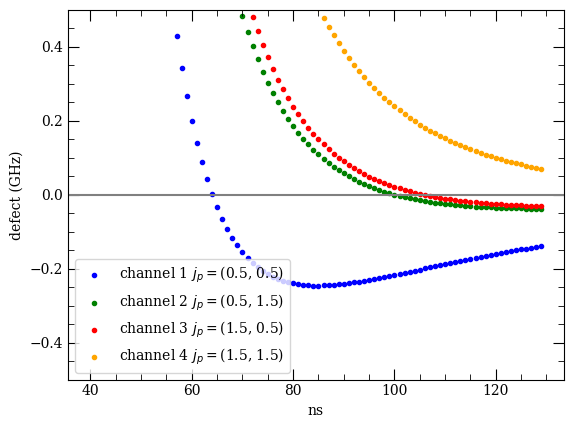

channel 1 = |Cs 64s_1/2, Cs 68s_1/2> -> |Cs 64p_0.5, Cs 67p_0.5>
j_pa, j_pb = (0.5, 0.5)
min defect = 1.6082210075460885
n = 64
channel 2 = |Cs 100s_1/2, Cs 104s_1/2> -> |Cs 100p_0.5, Cs 103p_1.5>
j_pa, j_pb = (0.5, 1.5)
min defect = 0.5777650596520785
n = 100
channel 3 = |Cs 106s_1/2, Cs 110s_1/2> -> |Cs 106p_1.5, Cs 109p_0.5>
j_pa, j_pb = (1.5, 0.5)
min defect = -0.5903465173582851
n = 106
channel 4 = |Cs 129s_1/2, Cs 133s_1/2> -> |Cs 129p_1.5, Cs 132p_1.5>
j_pa, j_pb = (1.5, 1.5)
min defect = 70.38727052595127
n = 129


In [94]:
plt.figure()
plt.scatter(ns,jp_deltas[0], label=f'channel {1} $j_p =$' + str(jps[0]), color = 'blue', marker='.')
plt.scatter(ns,jp_deltas[1], label=f'channel {2} $j_p =$' + str(jps[1]), color = 'green', marker='.')
plt.scatter(ns,jp_deltas[2], label=f'channel {3} $j_p =$' + str(jps[2]), color = 'red', marker='.')
plt.scatter(ns,jp_deltas[3], label=f'channel {4} $j_p =$' + str(jps[3]), color = 'orange', marker='.')

plt.axhline(y=0, color='grey')
plt.legend()
plt.ylabel('defect (GHz)')
plt.xlabel('ns')

plt.ylim([-0.5,0.5])

plt.show()
for i in range(4):
    print(f'channel {i+1} = |Cs {assoc_ns[i]}s_1/2, Cs {assoc_ns[i]+cs_dif}s_1/2> -> |Cs {assoc_ns[i]}p_{jps[i][0]}, Cs {assoc_ns[i]+cs_dif-1}p_{str(jps[i][1])}>')
    print(f'j_pa, j_pb = {jps[i]}')
    print(f'min defect = {min_defects[i]*1e3}')
    print(f'n = {assoc_ns[i]}')

64
                  ARPACK can only find up to dimension-1 eigenvectors, where                dimension is matrix dimension.

 Now we are plotting...
100
                  ARPACK can only find up to dimension-1 eigenvectors, where                dimension is matrix dimension.

 Now we are plotting...
106
                  ARPACK can only find up to dimension-1 eigenvectors, where                dimension is matrix dimension.

 Now we are plotting...
129
                  ARPACK can only find up to dimension-1 eigenvectors, where                dimension is matrix dimension.

 Now we are plotting...


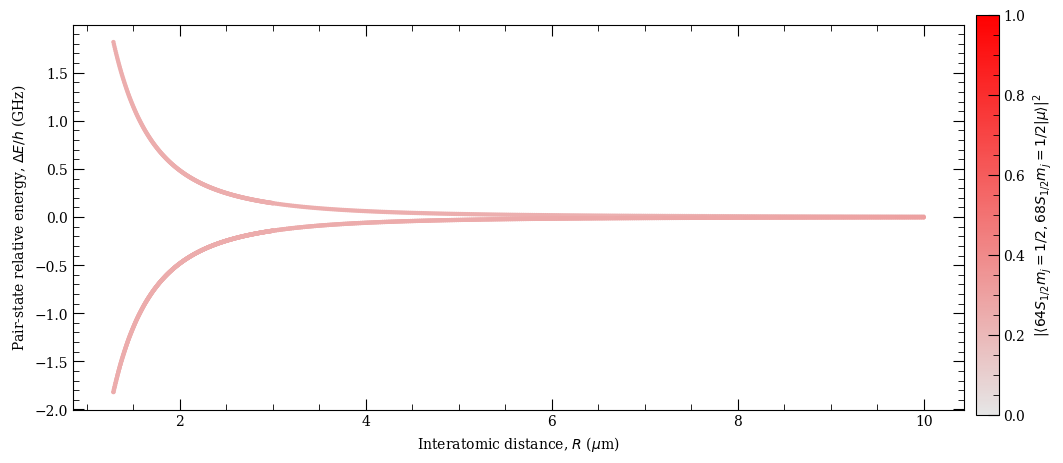

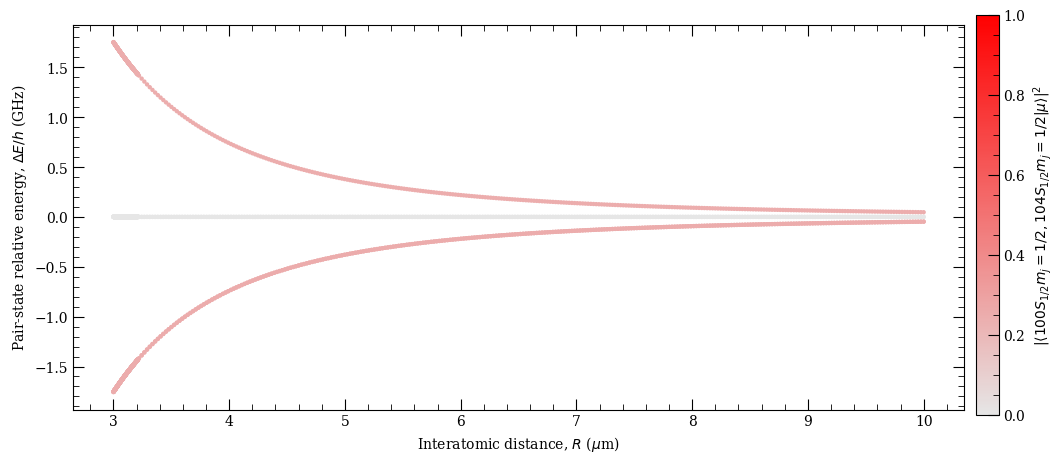

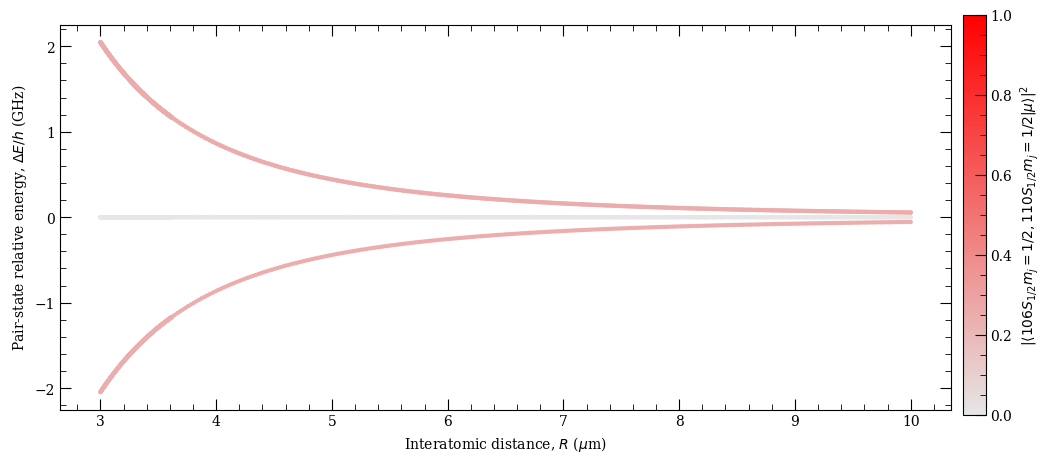

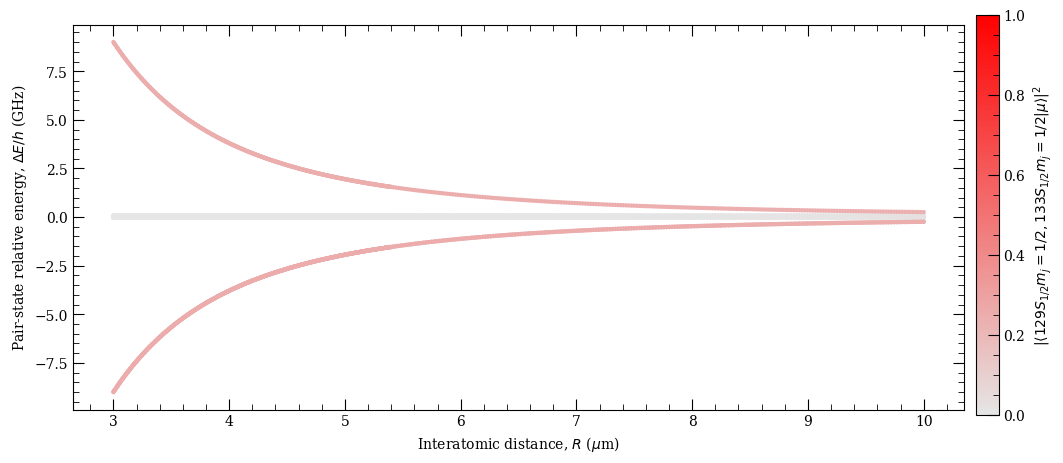

In [109]:

for i in range(4):
    pair = PairStateInteractions(Caesium(), assoc_ns[i], 0, 1/2, assoc_ns[i]+cs_dif, 0, 1/2, 1/2, 1/2)

    print(assoc_ns[i])

    pair.defineBasis(0, 0, cs_dif+1, 1, 1.1*abs(min_defects[i]*1e9), progressOutput=False)

    rvdw = pair.getLeRoyRadius()

    r = np.append(np.linspace(rvdw, 3, 300), np.linspace(3.01, 10.0, 300))

    nEig = 25
    pair.diagonalise(r, nEig, progressOutput=False)

    pair.plotLevelDiagram()

    pair.channel


In [104]:
epsilon_0 = scipy.constants.epsilon_0
a_0 = scipy.constants.physical_constants['Bohr radius'][0]
e = scipy.constants.e
print(epsilon_0,a_0,e)
# C3 coefficients
c3ks = []

def U_k(c3, defect, D):
    return -D*c3**2/defect/scipy.constants.hbar

Ds1 = (4/9, 14/9, 14/9, 22/9)
Ds2 = (8/9, 10/9, 10/9, 26/9)

cs1 = (0, 0, 1, 0)
cs2 = (1/np.sqrt(2), 1/np.sqrt(2), 0, 0)

U_ks = []
rvdws = []
for i in range(4):
 
    cs_matrix_element_j = arc.Rubidium().getReducedMatrixElementJ(assoc_ns[i]-1, 1, jps[i][0], assoc_ns[i], 0, .5)

    cs_matrix_element_j2 = arc.Caesium().getReducedMatrixElementJ(assoc_ns[i]+cs_dif, 0, .5, assoc_ns[i]+cs_dif, 1, jps[i][1])
   
    c3k = cs_matrix_element_j * cs_matrix_element_j2/np.sqrt(2*jps[i][0]+1)/np.sqrt(2*jps[i][1]+1)
    
    c3ks.append(c3k/1e6)

    U_ks.append(U_k(c3k/1e6, min_defects[i], Ds2[i]))

    rvdws.append

for i in range(4):
    print(f'channel {i+1} = |Cs {assoc_ns[i]}s_1/2, Cs {assoc_ns[i]+cs_dif}s_1/2> -> |Cs {assoc_ns[i]}p_{jps[i][0]}, Cs {assoc_ns[i]+cs_dif-1}p_{str(jps[i][1])}>')
    print(f'C3,k = {c3ks[i]}')
    print(f'Uk = {U_ks[i]}')


8.8541878188e-12 5.29177210544e-11 1.602176634e-19
channel 1 = |Cs 64s_1/2, Cs 68s_1/2> -> |Cs 64p_0.5, Cs 67p_0.5>
C3,k = 6.285292050095954
Uk = -2.0705060801419033e+38
channel 2 = |Cs 100s_1/2, Cs 104s_1/2> -> |Cs 100p_0.5, Cs 103p_1.5>
C3,k = 37.471343733638435
Uk = -2.5605224605259513e+40
channel 3 = |Cs 106s_1/2, Cs 110s_1/2> -> |Cs 106p_1.5, Cs 109p_0.5>
C3,k = -50.2465029081082
Uk = 4.505946236528391e+40
channel 4 = |Cs 129s_1/2, Cs 133s_1/2> -> |Cs 129p_1.5, Cs 132p_1.5>
C3,k = -107.24282515351527
Uk = -4.476071812632028e+39


64
                  ARPACK can only find up to dimension-1 eigenvectors, where                dimension is matrix dimension.

 Now we are plotting...
1.2858725125879238


[[64, 1, 0.5, 67, 1, 0.5, np.float64(0.0016104088252690619)],
 [64, 0, 0.5, 68, 0, 0.5, np.float64(0.0)],
 [67, 1, 0.5, 64, 1, 0.5, np.float64(0.0016104088252690619)],
 [68, 0, 0.5, 64, 0, 0.5, np.float64(0.0)]]

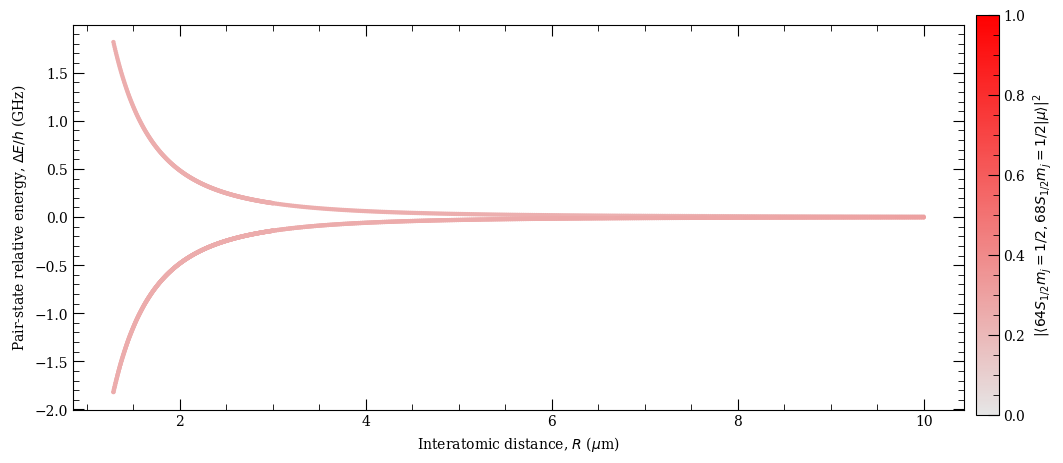

In [123]:
channel = 1

pair = PairStateInteractions(Caesium(), assoc_ns[channel-1], 0, 1/2, assoc_ns[channel-1]+cs_dif, 0, 1/2, 1/2, 1/2)

print(assoc_ns[channel-1])

pair.defineBasis(0, 0, cs_dif+1, 1, 1.1*abs(min_defects[channel-1]*1e9), progressOutput=False)

rvdw = pair.getLeRoyRadius()

r = np.append(np.linspace(rvdw, 3, 300), np.linspace(3.01, 10.0, 300))

nEig = 25
pair.diagonalise(r, nEig, progressOutput=False)

pair.plotLevelDiagram()
print(rvdw)
pair.channel

Data points to fit =  600
It's estimated to be around 16.87 mu m from the current fit.
Rvdw =   16.866308781223413  mu m
offset =  9.999868039874137e-09 
 scale =  -3.862564737548647


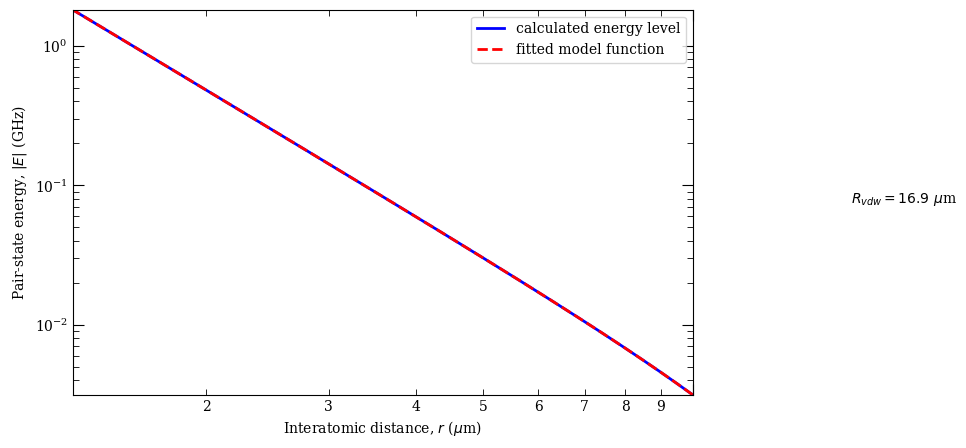

c3 =  3.8588579340067932  GHz /R^3 (mu m)^3
offset =  -0.0007374321132824142


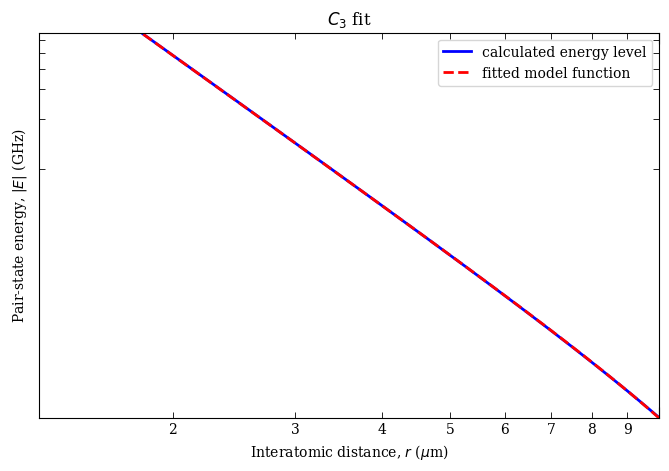


ERROR: could not find data for energy levels for interatomic
distances between 24 and 9.00 mu m.




In [127]:
rvdw = pair.getVdwFromLevelDiagram(
    1.000000, 20.000000, minStateContribution=0.2, showPlot=True
)
c3 = pair.getC3fromLevelDiagram(
    1.8, rvdw * 0.9, showPlot=True, minStateContribution=0.2
)
c6 = pair.getC6fromLevelDiagram(
    1.4 * rvdw, 9.0, showPlot=True, minStateContribution=0.2
)

In [61]:
print(c3)
print(c6**2/min_defects[channel-1]/1e6)

1.3824048571026697
0.23293045013777902


In [9]:
# C3 coefficients


C3 = arc.Rubidium().getC3term(assoc_ns[i], 0, )

TypeError: AlkaliAtom.getC3term() missing 7 required positional arguments: 'j', 'n1', 'l1', 'j1', 'n2', 'l2', and 'j2'